In [ ]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from gensim.models import word2vec
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

In [ ]:
from zipfile import ZipFile

In [ ]:
data = ZipFile('/content/drive/MyDrive/IMDB Dataset.csv.zip')

In [ ]:
data.extractall()

In [ ]:
data = pd.read_csv('IMDB Dataset.csv')

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
data.shape

(50000, 2)

In [ ]:
x_train = data['review'].values
y_train = data['sentiment'].values

In [ ]:
x_train

array(["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to

In [ ]:
y_train = [[1,0] if x == "positive" else [0,1] for x in y_train]

In [ ]:
y_train[0]

[1, 0]

In [ ]:
import re
def clean_text(text):
  if type(text)!=str:
    return str(text)
  return re.sub(r'[^0-9A-Za-z" "]','',text)

In [ ]:
x_train = [clean_text(here) for here in x_train]
save =[]
for each_sentence in x_train:
  save.append(each_sentence.split(" "))

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
words = set(nltk.corpus.words.words())
adjwords = set([x for x in words if len(wn.synsets(x)) > 0 and wn.synsets(x)[0].pos() in ['v', 'n', 'a', 's']]) 

In [ ]:
x_train = []
for each_sentence in save:
  filtered_sentence = [lemmatizer.lemmatize(x.lower()) for x in each_sentence if x.lower() not in stop_words]
  x_train.append(" ".join([x for x in filtered_sentence if x in adjwords]))

In [ ]:
x_train

['one reviewer watching episode hooked right first thing struck brutality unflinching scene violence set right word go trust show faint timid show pull punch regard drug sex violence classic use nickname given maximum security state focus emerald city experimental section prison cell glass front face privacy high agenda em city home scuffle death stare dodgy dealing shady agreement far say main appeal show due fact go show dare forget pretty picture painted audience forget charm forget mess first episode saw struck nasty say ready watched taste got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watching may become comfortable uncomfortable get touch side',
 'wonderful little production technique unassuming fashion give comforting sense realism entire piece actor well chosen sheen got voice pat see seamless reference diary entry we

In [ ]:
y_train[:10]

[[1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0]]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

In [ ]:
word_index = tokenizer.word_index

In [ ]:
word_index

{'movie': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'time': 5,
 'good': 6,
 'character': 7,
 'even': 8,
 'get': 9,
 'story': 10,
 'make': 11,
 'see': 12,
 'scene': 13,
 'much': 14,
 'well': 15,
 'people': 16,
 'great': 17,
 'bad': 18,
 'first': 19,
 'show': 20,
 'way': 21,
 'thing': 22,
 'made': 23,
 'think': 24,
 'go': 25,
 'life': 26,
 'know': 27,
 'watch': 28,
 'many': 29,
 'love': 30,
 'seen': 31,
 'two': 32,
 'actor': 33,
 'say': 34,
 'plot': 35,
 'look': 36,
 'acting': 37,
 'end': 38,
 'best': 39,
 'little': 40,
 'year': 41,
 'take': 42,
 'better': 43,
 'come': 44,
 'still': 45,
 'man': 46,
 'work': 47,
 'part': 48,
 'find': 49,
 'want': 50,
 'give': 51,
 'lot': 52,
 'back': 53,
 'director': 54,
 'watching': 55,
 'real': 56,
 'performance': 57,
 'guy': 58,
 'play': 59,
 'woman': 60,
 'another': 61,
 'funny': 62,
 'nothing': 63,
 'going': 64,
 'role': 65,
 'u': 66,
 'every': 67,
 'new': 68,
 'old': 69,
 'cant': 70,
 'cast': 71,
 'point': 72,
 'girl': 73,
 'fact': 74,
 'pretty': 75,
 

In [ ]:
x_train = tokenizer.texts_to_sequences(x_train)

In [ ]:
max_len = max(len(sentences) for sentences in x_train)

In [ ]:
x_train = pad_sequences(x_train,maxlen=20)

In [ ]:
len(x_train[0])

20

In [ ]:
wordvec = word2vec.Word2Vec(save, size = 50)

In [ ]:
from collections import defaultdict
def create_word_embedding(wordvec,word_index):
  word_embedding = defaultdict()
  for x,y in word_index.items():
    
    try:
      word_embedding[y] = np.array(wordvec[x])
    except:
      word_embedding[y] = np.random.rand(50)
    
  return word_embedding


In [ ]:
word_embedding = create_word_embedding(wordvec,word_index)
word_embedding[0] = np.zeros(50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [ ]:
x_train = [[word_embedding[x] for x in here] for here in x_train]

In [ ]:
len(x_train)

50000

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2)

In [ ]:
model = keras.Sequential()

In [ ]:
model.add(keras.layers.Conv1D(kernel_size=3,input_shape = (20,50),filters = 64))

In [ ]:
model.add(keras.layers.LSTM(128))

In [ ]:
model.add(keras.layers.Flatten())

In [ ]:
model.add(keras.layers.Dense(2, activation='softmax'))

In [ ]:
model.compile(loss = keras.losses.binary_crossentropy,optimizer = 'adam',metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 18, 64)            9664      
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 108,738
Trainable params: 108,738
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [ ]:
print(x_train.shape,x_test.shape)

(40000, 20, 50) (10000, 20, 50)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 20, 50,1)
x_test = x_test.reshape(x_test.shape[0], 20 , 50 ,1)

In [ ]:
x_train.shape

(40000, 20, 50, 1)

In [ ]:
x_test.shape

(10000, 20, 50, 1)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [ ]:
model.fit(x_train, y_train, epochs=10 , batch_size=8, validation_data=(x_test,y_test))

Epoch 1/10
5000/5000 [==============================] - 89s 17ms/step - loss: 0.5056 - acc: 0.7497 - val_loss: 0.4881 - val_acc: 0.7595
Epoch 2/10
5000/5000 [==============================] - 86s 17ms/step - loss: 0.4674 - acc: 0.7738 - val_loss: 0.4822 - val_acc: 0.7667
Epoch 3/10
5000/5000 [==============================] - 85s 17ms/step - loss: 0.4508 - acc: 0.7842 - val_loss: 0.4755 - val_acc: 0.7732
Epoch 4/10
5000/5000 [==============================] - 85s 17ms/step - loss: 0.4374 - acc: 0.7908 - val_loss: 0.4846 - val_acc: 0.7704
Epoch 5/10
5000/5000 [==============================] - 85s 17ms/step - loss: 0.4231 - acc: 0.7994 - val_loss: 0.4854 - val_acc: 0.7666
Epoch 6/10
5000/5000 [==============================] - 86s 17ms/step - loss: 0.4111 - acc: 0.8085 - val_loss: 0.4949 - val_acc: 0.7648
Epoch 7/10
5000/5000 [==============================] - 86s 17ms/step - loss: 0.4011 - acc: 0.8134 - val_loss: 0.5049 - val_acc: 0.7627
Epoch 8/10
5000/5000 [==========================

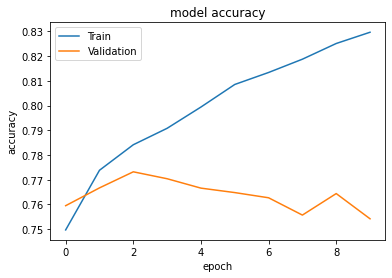

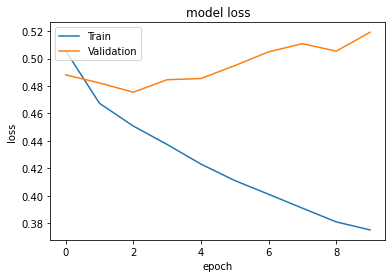

In [ ]:
history = model.history.history
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
import pickle as pkl
pkl.dump(model,open('save_model.pkl','wb'))

INFO:tensorflow:Assets written to: ram://8335effb-efaf-4607-8e64-aaffbf3d38e1/assets


INFO:tensorflow:Assets written to: ram://8335effb-efaf-4607-8e64-aaffbf3d38e1/assets


In [ ]:
pkl.dump(word_embedding,open('word_embeddings.pkl','wb'))

In [ ]:
len(word_embedding)

25401

In [ ]:
pkl.dump(word_index,open('word_index.pkl','wb'))

In [ ]:
pkl.dump(wordvec,open('wordvec.pkl','wb'))

In [ ]:
import shutil

In [ ]:
source = '/content/save_model.pkl'
target = '/content/drive/MyDrive/save_model_imdb.pkl'
shutil.copyfile(source,target)

'/content/drive/MyDrive/save_model_imdb.pkl'

In [ ]:
source = '/content/word_embeddings.pkl'
target = '/content/drive/MyDrive/word_embeddings_imdb.pkl'
shutil.copyfile(source,target)

'/content/drive/MyDrive/word_embeddings_imdb.pkl'

In [ ]:
source = '/content/word_index.pkl'
target = '/content/drive/MyDrive/word_index_imdb.pkl'
shutil.copyfile(source,target)

'/content/drive/MyDrive/word_index_imdb.pkl'

In [ ]:
source = '/content/wordvec.pkl'
target = '/content/drive/MyDrive/wordvec_imdb.pkl'
shutil.copyfile(source,target)

'/content/drive/MyDrive/wordvec_imdb.pkl'

In [ ]:
keras.__version__

'2.8.0'

In [ ]:
tf.__version__

'2.8.2'